# XGB test


In [41]:
%load_ext autoreload
%autoreload 2

%matplotlib widget

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import pandas as pd

import seaborn as sns

from math import log, pi, sin

import numpy as np
import matplotlib.pyplot as plt

from matplotlib import cm

from tqdm import tqdm

import itertools

from xgboost import XGBRegressor

from plots2.consts import (
    SMALL_FONT,
    MEDIUM_FONT,
    BIGGER_FONT,
)

from plots2.fns import get_corner_annotations

/Users/nicktaylor/opt/miniconda3/envs/poly2/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


# Subplot 1

## Dummy data 1

In [3]:
np.random.seed(2)

In [4]:
eps_y = 0.02
eps_z = 0.02

In [5]:
df1 = pd.DataFrame(dict(
    x = np.random.uniform(0, 1, 1000)
)).assign(
    y = lambda df: df.x + np.random.normal(0, eps_y, df.shape[0]),
    z = lambda df: df.x * (df.x - 1) + np.random.normal(0, eps_z,df.shape[0]),
)

df1

,x,y,z
0,0.435995,0.457482,-0.256658
1,0.025926,0.065848,-0.019990
2,0.549662,0.556571,-0.259604
3,0.435322,0.427666,-0.273682
4,0.420368,0.398102,-0.258361
...,...,...,...
995,0.598505,0.640731,-0.280636
996,0.358920,0.362260,-0.224672
997,0.680391,0.676630,-0.225103
998,0.853200,0.842032,-0.125250


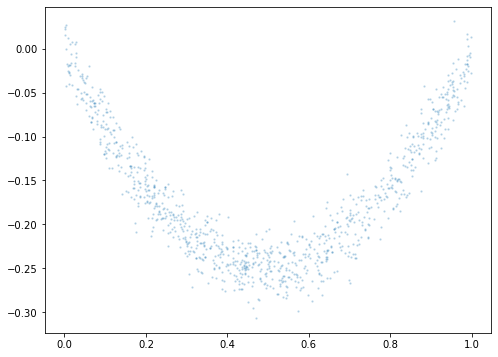

In [6]:
f, ax = plt.subplots(figsize=(8,6))

ax.scatter(df1.x, df1.z, s=2, alpha=0.2)

## Get model 1

In [7]:
PARS = dict(
    objective='reg:pseudohubererror',
    tree_method='exact',
    # learning_rate=0.3,
)

In [8]:
X = df1.drop('z', axis=1)
X.head(2)

,x,y
0,0.435995,0.457482
1,0.025926,0.065848


In [9]:
y = df1.loc[:, ['z']]
y.head(2)

,z
0,-0.256658
1,-0.019990


In [10]:
X_tr = X.head(800)
y_tr = y.head(800)
X_te = X.tail(200)
y_te = y.tail(200)

In [11]:
xgb1 = XGBRegressor(
    # n_estimators=ne,
    # max_depth=1,
    **PARS,
).fit(X_tr, y_tr)

/Users/nicktaylor/opt/miniconda3/envs/poly2/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [12]:
yp = xgb1.predict(X_te)

In [13]:
Xm, Ym = np.meshgrid(
    np.linspace(df1.x.min(), df1.x.max(), 50), 
    np.linspace(df1.y.min(), df1.y.max(), 50)
)

## Get plot data

In [14]:
Xp = pd.DataFrame(
    dict(
        x = Xm.reshape(Xm.shape[0]*Xm.shape[1],),
        y = Ym.reshape(Ym.shape[0]*Ym.shape[1],),
    )
)

In [15]:
Zm = xgb1.predict(Xp).reshape(Xm.shape[0], Xm.shape[1])

# Subplot 2

## Dummy data 2

In [16]:
np.random.seed(2)

In [17]:
eps_y = 0.02
eps_z = 0.02

In [18]:
df2 = pd.DataFrame(dict(
    x = np.random.uniform(-1, 1, 1000)
)).assign(
    y = lambda df: 1 - df.x**2 + np.random.normal(0, eps_y, df.shape[0]),
    z = lambda df: df.x * df.y + np.random.normal(0, eps_z,df.shape[0]),
)

df2

,x,y,z
0,-0.128010,1.005101,-0.139418
1,-0.948148,0.140938,-0.128366
2,0.099325,0.997044,0.086961
3,-0.129355,0.975611,-0.154065
4,-0.159264,0.952369,-0.166381
...,...,...,...
995,0.197009,1.003413,0.157342
996,-0.282160,0.923726,-0.255213
997,0.360783,0.866074,0.304820
998,0.706400,0.489832,0.346017


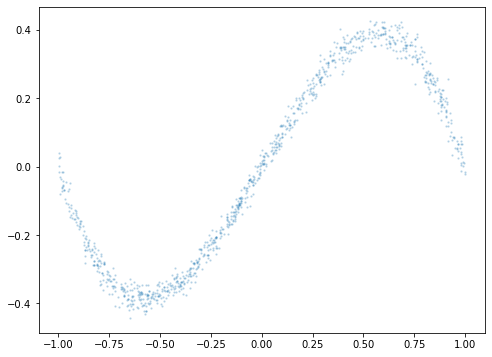

In [19]:
f, ax = plt.subplots(figsize=(8,6))

ax.scatter(df2.x, df2.z, s=2, alpha=0.2)

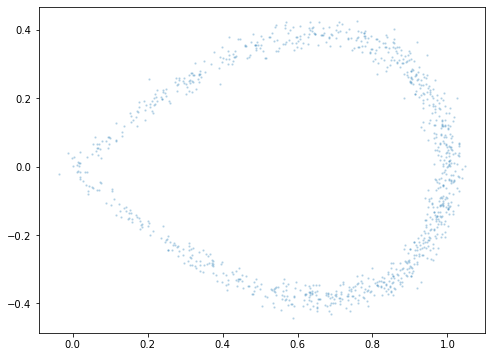

In [20]:
f, ax = plt.subplots(figsize=(8,6))

ax.scatter(df2.y, df2.z, s=2, alpha=0.2)

## Get model 2

In [21]:
PARS = dict(
    objective='reg:pseudohubererror',
    tree_method='exact',
    # learning_rate=0.3,
)

In [22]:
X2 = df2.drop('z', axis=1)
X2.head(2)

,x,y
0,-0.128010,1.005101
1,-0.948148,0.140938


In [23]:
y2 = df2.loc[:, ['z']]
y2.head(2)

,z
0,-0.139418
1,-0.128366


In [24]:
X_tr2 = X2.head(800)
y_tr2 = y2.head(800)
X_te2 = X2.tail(200)
y_te2 = y2.tail(200)

In [25]:
xgb2 = XGBRegressor(
    **PARS,
).fit(X_tr2, y_tr2)

/Users/nicktaylor/opt/miniconda3/envs/poly2/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [26]:
yp2 = xgb2.predict(X_te2)

In [27]:
Xm2, Ym2 = np.meshgrid(
    np.linspace(df2.x.min(), df2.x.max(), 51), 
    np.linspace(df2.y.min(), df2.y.max(), 51)
)

## Get plot data 2

In [28]:
Xp2 = pd.DataFrame(
    dict(
        x = Xm2.reshape(Xm2.shape[0]*Xm2.shape[1],),
        y = Ym2.reshape(Ym2.shape[0]*Ym2.shape[1],),
    )
)

In [29]:
Zm2 = xgb2.predict(Xp2).reshape(Xm2.shape[0], Xm2.shape[1])

# Plot

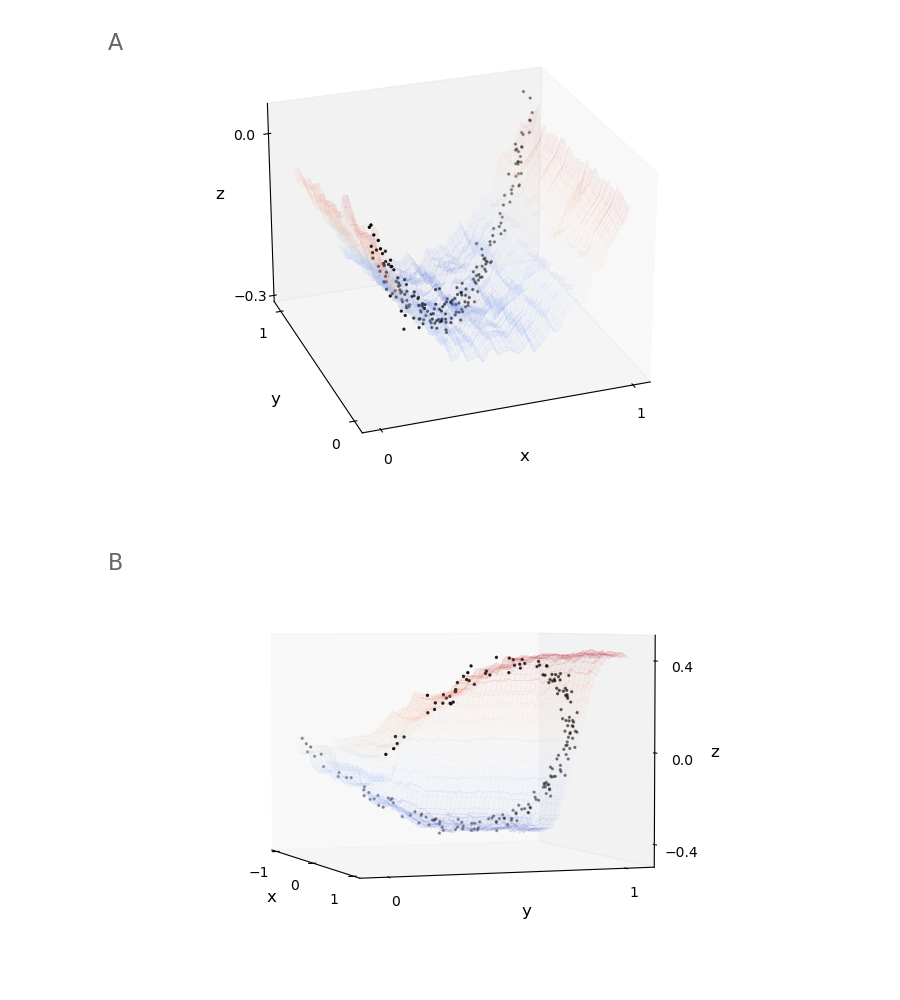

In [42]:
# fig = plt.figure(figsize=(9,10), dpi=1200)

fig = plt.figure(figsize=(9,10), dpi=100)

plt.rc('font', size=SMALL_FONT)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_FONT)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_FONT)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_FONT)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_FONT)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_FONT)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_FONT)  # fontsize of the figure title


# 1
ax = fig.add_subplot(2, 1, 1, projection='3d')

surf = ax.plot_surface(
    Xm,
    Ym,
    Zm,
    rstride=1,
    cstride=1,
    cmap=cm.coolwarm,
    linewidth=0,
    alpha=0.05,
    antialiased=False
)

ax.scatter(X_te.x, X_te.y, y_te.z, s=2, c='k')
    
ax.grid(False)

ax.view_init(25, -110)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.set_xticks([0,1])
ax.set_yticks([0,1])
ax.set_zticks([-0.3, 0])

# ax.invert_xaxis()


# 2
ax2 = fig.add_subplot(2, 1, 2, projection='3d')

surf2 = ax2.plot_surface(
    Xm2,
    Ym2,
    Zm2,
    rstride=1,
    cstride=1,
    cmap=cm.coolwarm,
    linewidth=0,
    alpha=0.05,
    antialiased=False
)

ax2.scatter(X_te2.x, X_te2.y, y_te2.z, s=2, c='k')
    
ax2.grid(False)

ax2.view_init(3, -20)

ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('z')

ax2.set_xticks([-1, 0,1])
ax2.set_yticks([0, 1])
ax2.set_zticks([-0.4, 0, 0.4])



plt.tight_layout(rect= [0, 0, 1, 1], h_pad=3)

get_corner_annotations(1, 2, 0.12, 0.95, 0.118, 0.52, plt)

In [40]:
fig.savefig('../figures/paper/xgb2.jpg', dpi=1200, bbox_inches="tight")